In [1]:
import os
import numpy as np
from data.gestures import linear_accelerometer
from iotai_sensor_classification.recording import read_recordings
from iotai_sensor_classification.preprocess import parse_recording
from iotai_sensor_classification.plot_util import column_histograms, plot_columns
from iotai_sensor_classification.recording import filter_columns

In [2]:
def gesture_recordings():
    """Read gesture recordings for all tests in file."""
    recordings_dir = os.path.dirname(linear_accelerometer.__file__)
    recordings = read_recordings(recordings_dir=recordings_dir)
    return recordings

gesture_recordings_ = gesture_recordings()

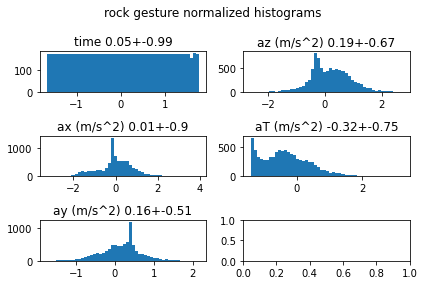

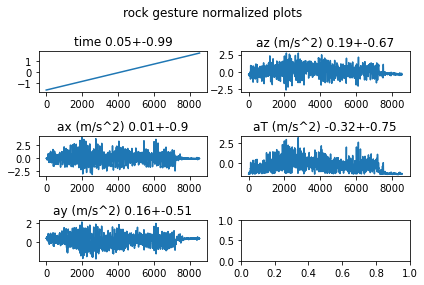

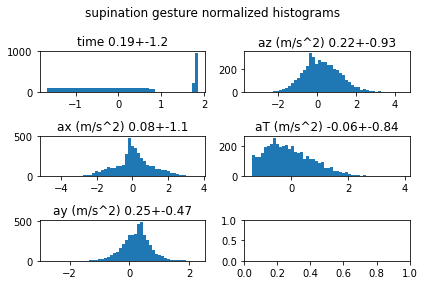

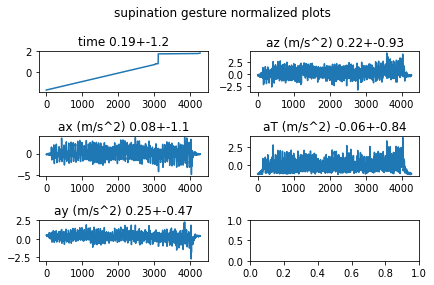

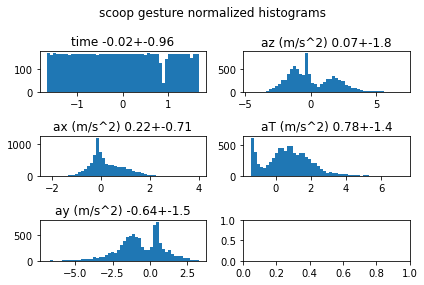

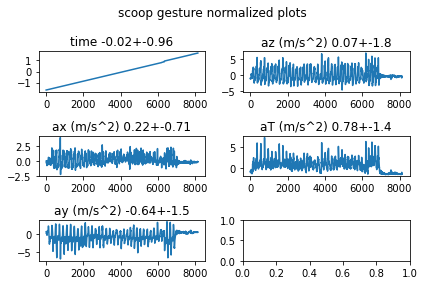

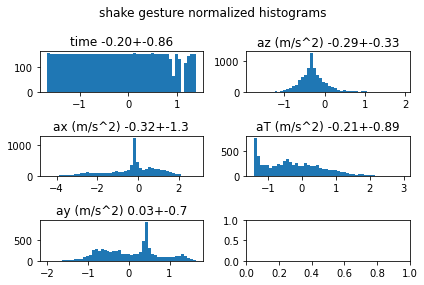

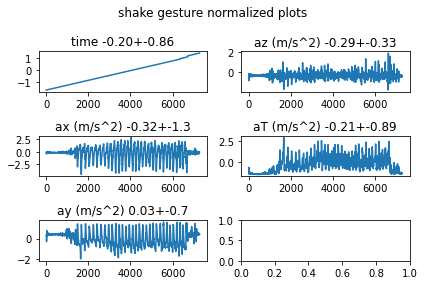

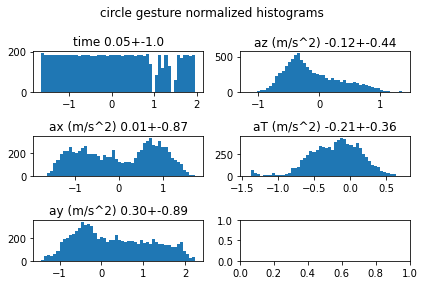

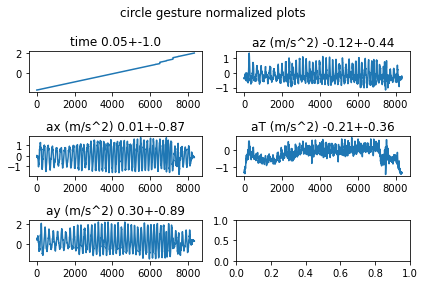

In [3]:
# def test_parse_gestures(gesture_recordings):
#     """Test parsing gesture data creating labels into a dataset for training and or testing models."""
parsed_gestures, label_coder = parse_recording(gesture_recordings_)
assert all(label_coder.decode_one_hots(parsed_gestures["label_code"]) == parsed_gestures["label"])
parsed_numbers = filter_columns(parsed_gestures)
assert all(np.isclose(parsed_numbers.mean(axis=0), 0.0))
assert all(np.isclose(parsed_numbers.std(axis=0), 1.0))
gesture_names = parsed_gestures['label'].unique()
test_output = os.path.join("test_output", "gestures", "preprocessed")
os.makedirs(test_output, exist_ok=True)
for gesture_name in gesture_names:
    gesture_rows = parsed_gestures.loc[parsed_gestures['label'].isin([gesture_name])]
    column_histograms(gesture_rows, name=f"{gesture_name} gesture normalized")
    plot_columns(gesture_rows, name=f"{gesture_name} gesture normalized")